In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [42]:
df = pd.read_csv('C:/Users/ASUS/Desktop/IoT-Sensor-Data-Analyzation/iot_sensor_data.csv')

In [43]:
df.head()

,Timestamp,Device_ID,Temperature,Humidity,Pressure,Vibration,Battery_Level,Status
0,2024-01-05 06:00:00,Device_5,34.66,35.30,1044.25,1.60,28.95,OK
1,2024-01-19 03:00:00,Device_7,34.52,47.78,954.28,2.35,68.76,OK
2,2024-02-05 20:00:00,Device_8,21.95,23.11,994.64,2.51,65.47,OK
3,2024-01-12 06:00:00,Device_1,47.41,39.45,957.00,1.00,83.36,OK
4,2024-01-05 10:00:00,Device_6,47.89,77.17,1022.92,1.58,98.94,OK


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      1000 non-null   object 
 1   Device_ID      1000 non-null   object 
 2   Temperature    1000 non-null   float64
 3   Humidity       1000 non-null   float64
 4   Pressure       1000 non-null   float64
 5   Vibration      1000 non-null   float64
 6   Battery_Level  1000 non-null   float64
 7   Status         1000 non-null   object 
dtypes: float64(5), object(3)
memory usage: 62.6+ KB


In [45]:
df.describe()

,Temperature,Humidity,Pressure,Vibration,Battery_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29.675760,55.965700,999.912030,2.441480,59.014310
std,11.331009,20.054581,28.817193,1.428334,23.699271
min,10.010000,20.030000,950.020000,0.000000,20.050000
25%,19.695000,38.827500,975.222500,1.220000,37.757500
50%,29.635000,56.955000,1000.670000,2.390000,59.140000
75%,39.492500,73.337500,1025.155000,3.690000,78.990000
max,49.880000,89.980000,1049.760000,4.990000,99.990000


In [46]:
df['Status'].value_counts()

Status
OK          693
Warning     218
Critical     89
Name: count, dtype: int64

In [47]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [48]:
df.head()

,Timestamp,Device_ID,Temperature,Humidity,Pressure,Vibration,Battery_Level,Status
0,2024-01-05 06:00:00,Device_5,34.66,35.30,1044.25,1.60,28.95,OK
1,2024-01-19 03:00:00,Device_7,34.52,47.78,954.28,2.35,68.76,OK
2,2024-02-05 20:00:00,Device_8,21.95,23.11,994.64,2.51,65.47,OK
3,2024-01-12 06:00:00,Device_1,47.41,39.45,957.00,1.00,83.36,OK
4,2024-01-05 10:00:00,Device_6,47.89,77.17,1022.92,1.58,98.94,OK


In [49]:
df = df.sort_values('Timestamp')

In [50]:
df.head()

,Timestamp,Device_ID,Temperature,Humidity,Pressure,Vibration,Battery_Level,Status
897,2024-01-01 00:00:00,Device_7,15.15,83.25,999.21,1.21,96.41,OK
284,2024-01-01 01:00:00,Device_10,33.88,58.83,1019.85,1.64,88.67,OK
367,2024-01-01 01:00:00,Device_5,31.59,71.60,1025.37,3.53,73.83,Warning
90,2024-01-01 01:00:00,Device_5,27.68,31.59,970.11,2.62,39.53,Warning
578,2024-01-01 04:00:00,Device_10,16.06,40.70,981.77,3.56,76.09,OK


In [51]:
df.isnull().sum()

Timestamp        0
Device_ID        0
Temperature      0
Humidity         0
Pressure         0
Vibration        0
Battery_Level    0
Status           0
dtype: int64

In [52]:
#Created new column : Hour of the day
df['Hour'] = df['Timestamp'].dt.hour


In [53]:
df.head()

,Timestamp,Device_ID,Temperature,Humidity,Pressure,Vibration,Battery_Level,Status,Hour
897,2024-01-01 00:00:00,Device_7,15.15,83.25,999.21,1.21,96.41,OK,0
284,2024-01-01 01:00:00,Device_10,33.88,58.83,1019.85,1.64,88.67,OK,1
367,2024-01-01 01:00:00,Device_5,31.59,71.60,1025.37,3.53,73.83,Warning,1
90,2024-01-01 01:00:00,Device_5,27.68,31.59,970.11,2.62,39.53,Warning,1
578,2024-01-01 04:00:00,Device_10,16.06,40.70,981.77,3.56,76.09,OK,4


In [54]:
#Calculating average temperature per devise
avg_temp = df.groupby('Device_ID')['Temperature'].mean().reset_index()
#avg_temp = avg_temp.sort_values('Temperature')
avg_temp.head(11)

,Device_ID,Temperature
0,Device_1,29.747931
1,Device_10,31.238454
2,Device_2,29.172212
3,Device_3,31.153200
4,Device_4,28.370241
5,Device_5,29.580294
6,Device_6,30.088000
7,Device_7,31.096000
8,Device_8,28.362778
9,Device_9,27.922737


In [55]:
#Tempreture Tren for

In [56]:
df.isnull().sum()

Timestamp        0
Device_ID        0
Temperature      0
Humidity         0
Pressure         0
Vibration        0
Battery_Level    0
Status           0
Hour             0
dtype: int64

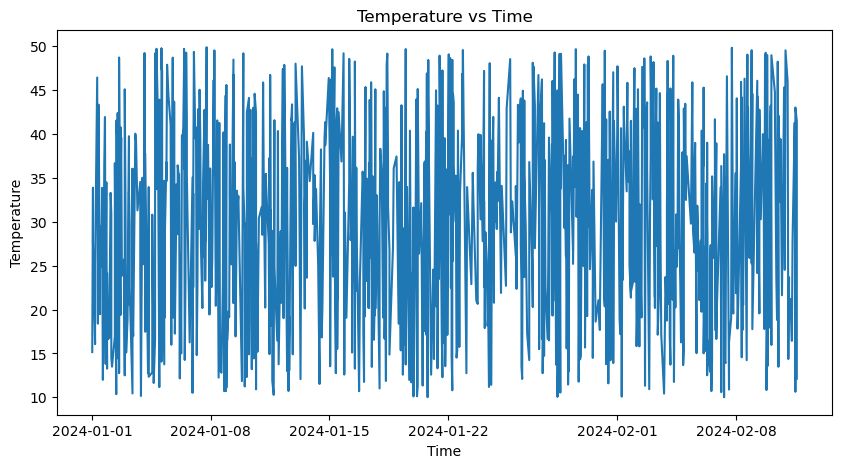

In [57]:
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Temperature'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs Time")
plt.show()


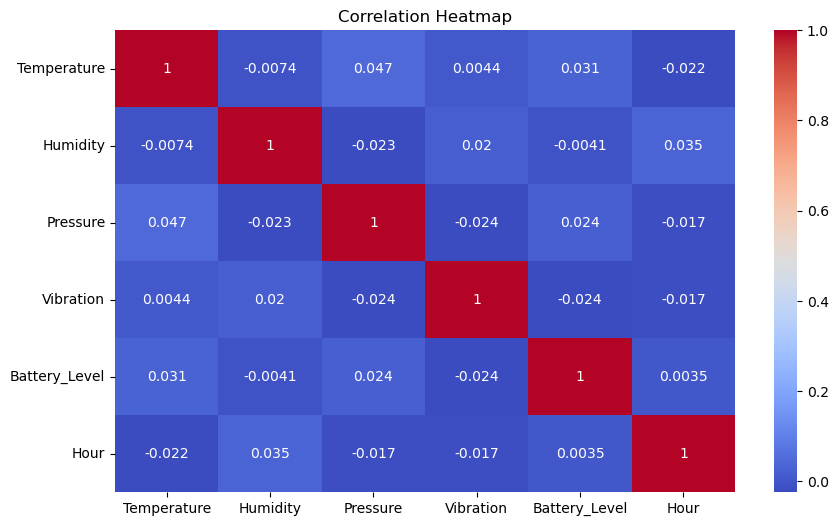

In [61]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number').fillna(0)
corr = numeric_df.corr()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
